In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu
from scipy.interpolate import UnivariateSpline

import numpy as np
import math
# Specify the file path

def calculate_curvature(x, y):
    # Calculate the first derivative
    dx = np.gradient(x)
    dy = np.gradient(y)

    # Calculate the second derivative
    d2x = np.gradient(dx)
    d2y = np.gradient(dy)

    # Calculate the local curvature
    curvature = np.abs((dx * d2y - dy * d2x) / (dx ** 2 + dy ** 2) ** 1.5)

    return curvature
def calculate_surface_roughness_mean(x_coordinates, y_coordinates):
    # Convert coordinates to NumPy arrays
    x = np.array(x_coordinates)
    y = np.array(y_coordinates)

    # Calculate the total number of points
    num_points = len(x)

    # Calculate the average distance between consecutive points
    average_distance = np.mean(np.sqrt((x[1:] - x[:-1])**2 + (y[1:] - y[:-1])**2))

    # Calculate the difference between the actual distance and the average distance for each point
    differences = np.sqrt((x[1:] - x[:-1])**2 + (y[1:] - y[:-1])**2) - average_distance

    # Calculate the root mean square (RMS) of the differences
    surface_roughness = np.sqrt(np.mean(differences**2))

    return surface_roughness

def calculate_surface_roughness_interpolate(x, y, smoothing_factor):
    # Fit a smoothed curve to the boundary
    t = np.arange(len(x))
    spl = UnivariateSpline(t, x, k=smoothing_factor)
    smooth_x = spl(t)
    spl = UnivariateSpline(t, y, k=smoothing_factor)
    smooth_y = spl(t)

    # Calculate the deviation of each point from the smoothed curve
    deviations = np.sqrt((x - smooth_x) ** 2 + (y - smooth_y) ** 2)

    # Calculate the average surface roughness
    surface_roughness = np.mean(deviations)
    return surface_roughness, smooth_x, smooth_y
def calculate_surface_roughness_time_avg(x, y, window_size):
    # Calculate the time average of points using a sliding window
    smooth_x = np.convolve(x, np.ones(window_size)/window_size, mode='valid')
    smooth_y = np.convolve(y, np.ones(window_size)/window_size, mode='valid')

    # Calculate the deviation of each point from the time-averaged curve
    deviations = np.sqrt((x[window_size-1:] - smooth_x) ** 2 + (y[window_size-1:] - smooth_y) ** 2)

    # Calculate the average surface roughness
    surface_roughness = np.mean(deviations)
    return surface_roughness, smooth_x, smooth_y


def final_function(file_path):
    

    # Read the tab-delimited file into a DataFrame
    data = pd.read_csv(file_path, delimiter='\t')
    data
    num_columns = data.shape[1]
    # Display the DataFrame
    #%matplotlib widget
    x_coords=[]
    y_coords=[]
    for i in range(num_columns):
        if i%2==0 or i==0:
            x = data.iloc[:, i].tolist()
        
            x_coords.append(x)
        else:
            y=data.iloc[:, i].tolist()
            y_coords.append(y)
    #for i in range(len(x_coords)):
        #plt.scatter(x_coords[i],y_coords[i],s=0.01)
    #plt.show()
    
    x_store = [[value for value in sublist if not math.isnan(value)] for sublist in x_coords]
    y_store = [[value for value in sublist if not math.isnan(value)] for sublist in y_coords]


    roughness_mean_store=[]
    roughness_interpolate_store=[]
    roughness_time_avg_store=[]
    num_microvilli_curvature=[]
    for i in range(len(x_store)):
        x_list =x_store[i]
        y_list =y_store[i]
    
        smoothing = 3  # Smoothing factor, adjust as needed
        window_size = 10
        curvature_cutoff=1
        roughness_mean = calculate_surface_roughness_mean(x_list, y_list)
        roughness_interpolate, smooth_x, smooth_y = calculate_surface_roughness_interpolate(x_list, y_list, smoothing)
        roughness_time_avg, smooth_x, smooth_y = calculate_surface_roughness_time_avg(x_store[i], y_store[i], window_size)
        
        curvature=calculate_curvature(smooth_x, smooth_y)

        curvature_filtered = [i for i in curvature if i >curvature_cutoff]
        num_microvilli_curvature.append(len(curvature_filtered)) ### estimeate the number of microvilli from the local curvature

        
        
        roughness_mean_store.append(roughness_mean)
        roughness_interpolate_store.append(roughness_interpolate)
        roughness_time_avg_store.append(roughness_time_avg)
    
    #%matplotlib widget
    fig, axs = plt.subplots(2, 1, figsize=(3, 4))

    # Plot roughness_mean_store
    axs[0].plot(roughness_mean_store)
    axs[0].set_title('Roughness Mean Store')

    # Plot roughness_interpolate_store
    #axs[1].plot(roughness_interpolate_store)
    #axs[1].set_title('Roughness Interpolate Store')

    # Plot roughness_time_avg_store
    axs[1].plot(roughness_time_avg_store)
    axs[1].set_title('Roughness Time Avg Store')

    # Adjust spacing between subplots
    plt.tight_layout()

    # Display the plot
    plt.show()
    
    return    num_microvilli_curvature



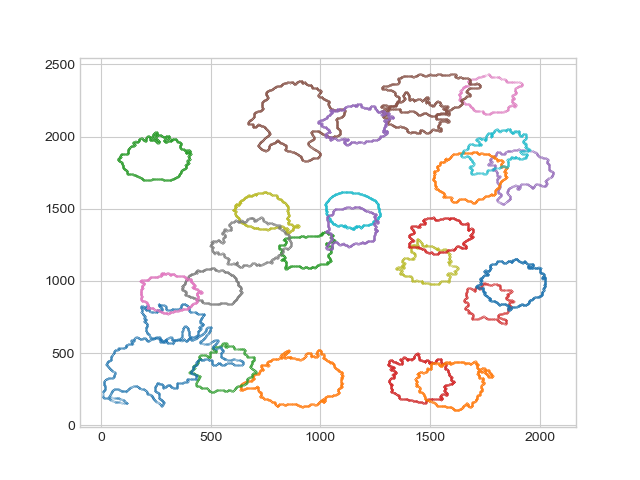

In [64]:
%matplotlib widget
file_path = 'SMIHF2_perm_syn_perm.txt'

# Read the tab-delimited file into a DataFrame
data = pd.read_csv(file_path, delimiter='\t')
data
num_columns = data.shape[1]
# Display the DataFrame

x_coords=[]
y_coords=[]
for i in range(num_columns):
    if i%2==0 or i==0:
        x = data.iloc[:, i].tolist()
        
        x_coords.append(x)
    else:
        y=data.iloc[:, i].tolist()
        y_coords.append(y)
        
    
for i in range(len(x_coords)):
    plt.scatter(x_coords[i],y_coords[i],s=0.01)
plt.show()
    
x_store = [[value for value in sublist if not math.isnan(value)] for sublist in x_coords]
y_store = [[value for value in sublist if not math.isnan(value)] for sublist in y_coords]


Surface roughness: 1.2218367790579585


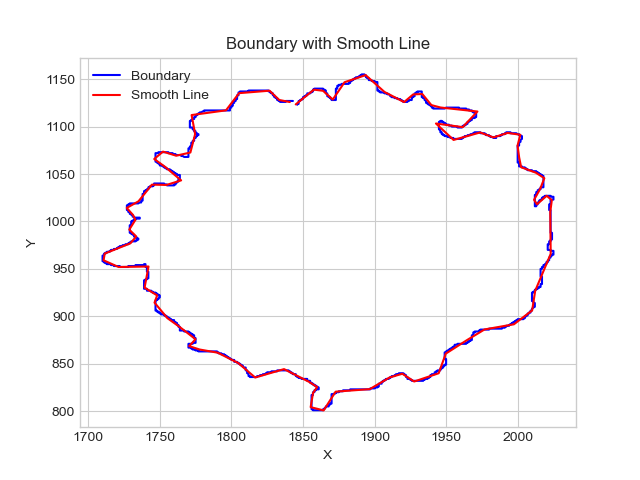

In [123]:
%matplotlib widget
n=10
x_list =x_store[n]
y_list =y_store[n]
window_size =1
# Adjust the window size as needed

roughness, smooth_x, smooth_y = calculate_surface_roughness_interpolate( x_list,  y_list, window_size)
print(f"Surface roughness: {roughness}")

# Plot the original boundary and the smooth line
plt.plot(x_list, y_list, 'b-', label='Boundary')
plt.plot(smooth_x, smooth_y, 'r-', label='Smooth Line')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Boundary with Smooth Line')
plt.show()

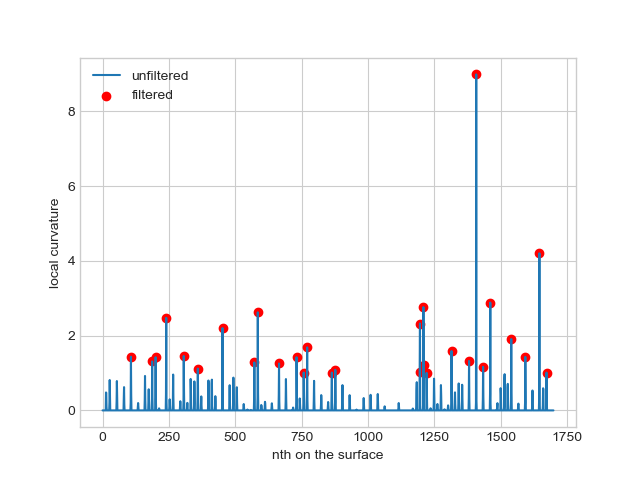

In [152]:
%matplotlib widget
curvature=calculate_curvature(smooth_x, smooth_y)
x=np.arange(0,len(curvature),1)
plt.plot(x,curvature)
plt.xlabel('nth on the surface')
plt.ylabel('local curvature')
curvature_filtered = [i for i in curvature if i > 1]
curvature_filtered_ind = [i for i,j in enumerate(curvature) if j > 1]
plt.scatter(curvature_filtered_ind,curvature_filtered,color='r')
plt.legend(['unfiltered','filtered'])


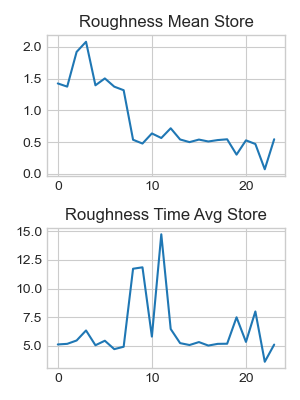

In [67]:
SMIHF2_perm_syn_actin_roughness=final_function('SMIHF2_perm_syn_actin.txt')

C:\Users\Selz\AppData\Local\Temp/ipykernel_12748/853890652.py:20: RuntimeWarning: invalid value encountered in true_divide
  curvature = np.abs((dx * d2y - dy * d2x) / (dx ** 2 + dy ** 2) ** 1.5)


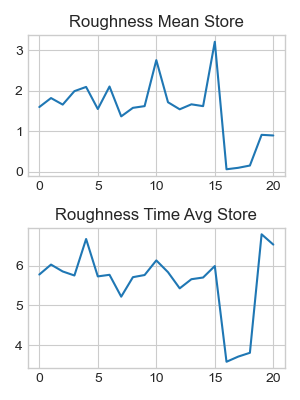

In [68]:
ck666_perm_syn_CD45_roughness=final_function('Ck666_perm_syn_CD45.txt')

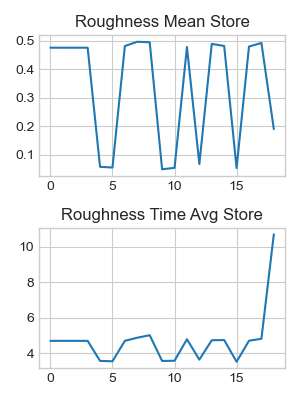

In [69]:

WT_perm_syn_actin_roughness=final_function('XY_Coordinatescsv3.txt')

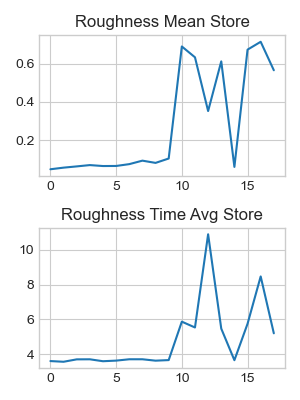

In [70]:
ck666_perm_syn_perm_roughness=final_function('CK666_perm_syn_perm.txt')

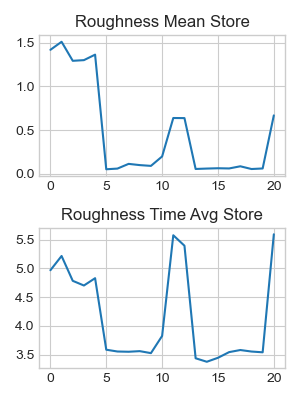

In [71]:
WT_perm_syn_CD45_roughness=final_function('WT_perm_syn_CD45.txt')

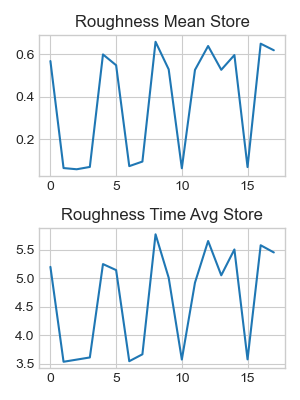

In [72]:
WT_perm_syn_perm_roughness=final_function('WT_perm_syn_perm.txt')

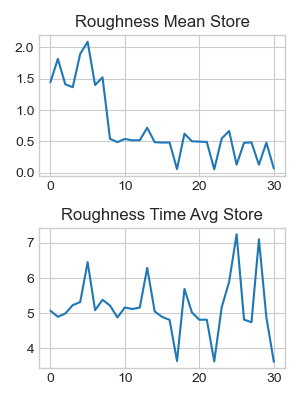

In [73]:
SMIHF2_perm_syn_CD45_roughness=final_function('SMIHF2_perm_syn_CD45.txt')

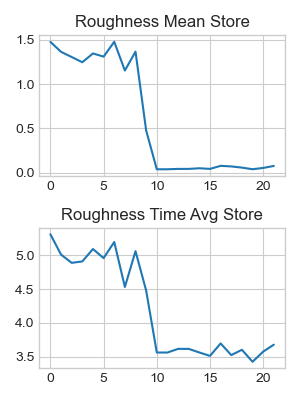

In [74]:
WT_perm_postsyn_actin_roughness=final_function('WT_perm_postsyn_actin.txt')

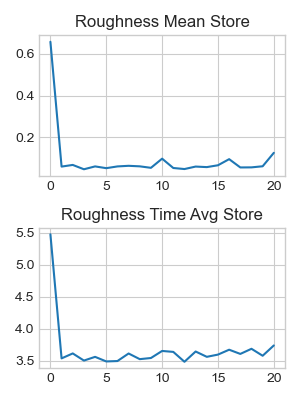

In [75]:
WT_perm_postsyn_CD45_roughness=final_function('WT_perm_postsyn_CD45.txt')

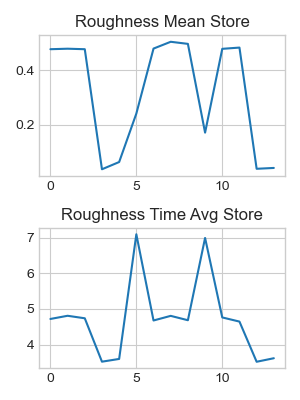

In [76]:
WT_perm_postsyn_perm_roughness=final_function('WT_perm_postsyn_perm.txt')

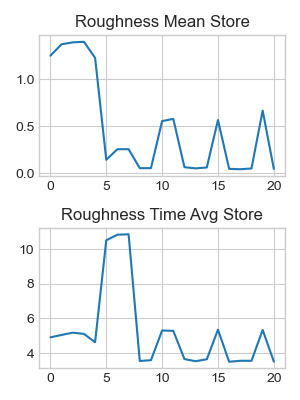

In [77]:
ck666_perm_postsyn_actin_roughness=final_function('CK666_perm_postsyn_actin.txt')


C:\Users\Selz\AppData\Local\Temp/ipykernel_12748/853890652.py:20: RuntimeWarning: invalid value encountered in true_divide
  curvature = np.abs((dx * d2y - dy * d2x) / (dx ** 2 + dy ** 2) ** 1.5)


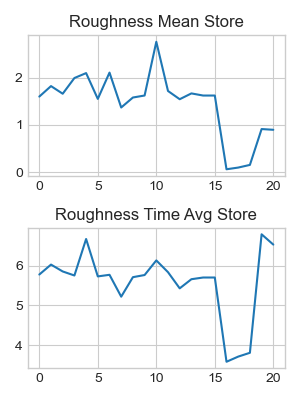

In [78]:
ck666_perm_syn_actin_roughness=final_function('CK666_perm_syn_actin.txt')

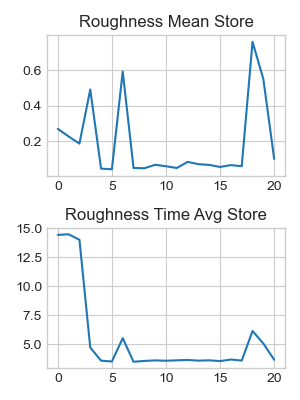

In [79]:
ck666_perm_postsyn_CD45_roughness=final_function('CK666_perm_postsyn_CD45.txt')

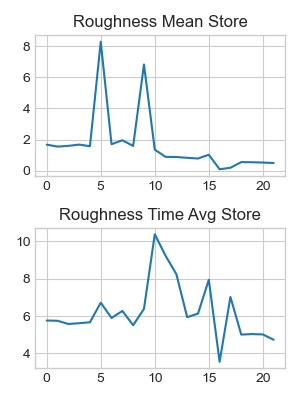

In [80]:
ck666_perm_postsyn_perm_roughness=final_function('CK666_perm_postsyn_perm.txt')

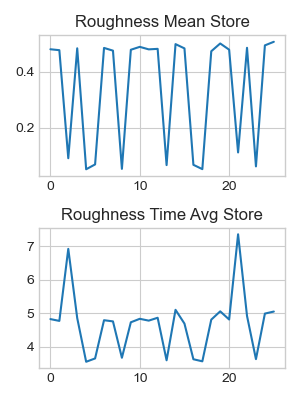

In [81]:
SMIHF2_perm_postsyn_actin_roughness=final_function('SMIHF2_perm_postsyn_actin.txt')

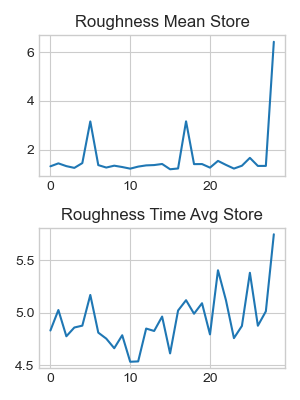

In [82]:
SMIHF2_perm_postsyn_CD45_roughness=final_function('SMIHF2_perm_postsyn_CD45.txt')

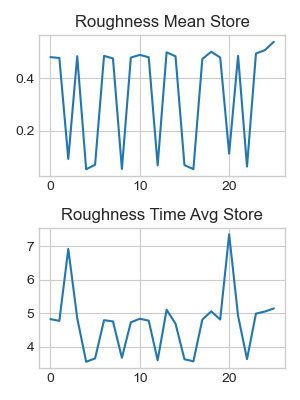

In [83]:
 SMIHF2_perm_postsyn_perm_roughness=final_function('SMIHF2_perm_postsyn_perm.txt')

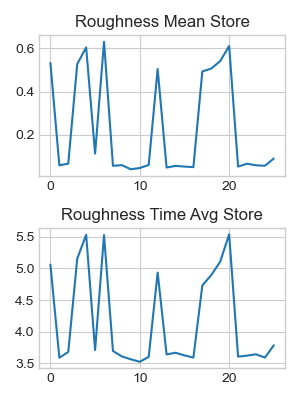

In [84]:
SMIHF2_perm_syn_perm_roughness=final_function('SMIHF2_perm_syn_perm.txt')

In [85]:
import matplotlib.pyplot as plt
import tkinter as tk
from scipy.stats import ttest_ind


def plot_histogram():
    plt.clf()
    for i, data in enumerate(selected_lists):
        plt.hist(data, bins=10, density=True, alpha=0.7, label=button_names[selected_buttons[i]])
    plt.xlabel('surface roughness')
    plt.ylabel('Frequency')
    plt.xlim([0.03, 2.5])
    plt.title('Histogram')
    plt.legend()
    plt.show()

    # Perform a t-test between two selected lists
    if len(selected_lists) == 2:
        group1 = selected_lists[0]
        group2 = selected_lists[1]
        t_stat, p_value = ttest_ind(group1, group2)
        print("T-Statistic:", t_stat)
        print("P-Value:", p_value)
        

    print(button_names[selected_buttons[i]], np.mean(data))

def button_click(index):
    %matplotlib notebook
    if index not in selected_buttons:
        selected_buttons.append(index)
        selected_lists.append(lists[index])
    plot_histogram()


# Sample data for demonstration
lists = [
    WT_perm_syn_actin_roughness,
    WT_perm_syn_CD45_roughness,
    WT_perm_syn_perm_roughness,
    WT_perm_postsyn_actin_roughness,
    WT_perm_postsyn_CD45_roughness,
    WT_perm_postsyn_perm_roughness,
    ck666_perm_syn_actin_roughness,
    ck666_perm_syn_CD45_roughness,
    ck666_perm_syn_perm_roughness,
    ck666_perm_postsyn_actin_roughness,
    ck666_perm_postsyn_CD45_roughness,
    ck666_perm_postsyn_perm_roughness,
    SMIHF2_perm_syn_actin_roughness,
    SMIHF2_perm_syn_CD45_roughness,
    SMIHF2_perm_syn_perm_roughness,
    SMIHF2_perm_postsyn_actin_roughness,
    SMIHF2_perm_postsyn_CD45_roughness,
    SMIHF2_perm_postsyn_perm_roughness,
    
]

button_names = [
'WT_syn_actin',
'WT_syn_CD45',
'WT_syn_perm',
'WT_postsyn_actin',
'WT_postsyn_CD45',
'WT_postsyn_perm',
'ck666_syn_actin',
'ck666_syn_CD45',
'ck666_syn_perm',
'ck666_postsyn_actin',
'ck666_postsyn_CD45',
'ck666_postsyn_perm',
'SMIHF2_syn_actin',
'SMIHF2_syn_CD45',
'SMIHF2_syn_perm',
'SMIHF2_postsyn_actin',
'SMIHF2_postsyn_CD45',
'SMIHF2_postsyn_perm'
]
# Create the main window
root = tk.Tk()

selected_buttons = []
selected_lists = []

# Create buttons
for i, lst in enumerate(button_names):
    button = tk.Button(root, text=lst, command=lambda index=i: button_click(index))
    button.pack()

# Start the Tkinter event loop
root.mainloop()

In [86]:
def plot_histogram():
    plt.clf()
    for i, data in enumerate(selected_lists):
        plt.hist(data, bins=7, density=True, alpha=0.7, label=button_names[selected_buttons[i]])
    plt.style.use('seaborn-whitegrid')
    plt.xlabel('surface roughness')
    plt.ylabel('Frequency')
    #plt.xlim([0.00, 2.5])
    plt.title('Actin post-synapse')
    plt.legend()
    plt.show()

    # Perform statistical tests between selected lists
    #if len(selected_lists) == 2:
    #    group1 = selected_lists[0]
     #   group2 = selected_lists[1]
    #    t_stat, p_value = ttest_ind(group1, group2)
    #    u_stat, mw_p_value = mannwhitneyu(group1, group2, alternative='two-sided')
    #    print("T-Statistic (Group 1 vs. Group 2):", t_stat)
    #    print("T-Test P-Value (Group 1 vs. Group 2):", p_value)
    #    print("U-Statistic (Group 1 vs. Group 2):", u_stat)
    #    print("Mann-Whitney U Test P-Value (Group 1 vs. Group 2):", mw_p_value)
    if len(selected_lists) == 3:
        group1 = selected_lists[0]
        group2 = selected_lists[1]
        group3 = selected_lists[2]
        t_stat1, p_value1 = ttest_ind(group1, group2)
        t_stat2, p_value2 = ttest_ind(group1, group3)
        t_stat3, p_value3 = ttest_ind(group2, group3)
        u_stat1, mw_p_value1 = mannwhitneyu(group1, group2, alternative='two-sided')
        u_stat2, mw_p_value2 = mannwhitneyu(group1, group3, alternative='two-sided')
        u_stat3, mw_p_value3 = mannwhitneyu(group2, group3, alternative='two-sided')
       # print("T-Statistic (Group 1 vs. Group 2):", t_stat1)
       # print("T-Test P-Value (Group 1 vs. Group 2):", p_value1)
       # print("U-Statistic (Group 1 vs. Group 2):", u_stat1)
        print("Mann-Whitney U Test P-Value (Group 1 vs. Group 2):", mw_p_value1)
       # print("T-Statistic (Group 1 vs. Group 3):", t_stat2)
       # print("T-Test P-Value (Group 1 vs. Group 3):", p_value2)
       # print("U-Statistic (Group 1 vs. Group 3):", u_stat2)
        print("Mann-Whitney U Test P-Value (Group 1 vs. Group 3):", mw_p_value2)
       # print("T-Statistic (Group 2 vs. Group 3):", t_stat3)
       # print("T-Test P-Value (Group 2 vs. Group 3):", p_value3)
       # print("U-Statistic (Group 2 vs. Group 3):", u_stat3)
        print("Mann-Whitney U Test P-Value (Group 2 vs. Group 3):", mw_p_value3)

    for i, data in enumerate(selected_lists):
        print(button_names[selected_buttons[i]], np.mean(data))
def button_click(index):
    %matplotlib notebook
    if index not in selected_buttons:
        selected_buttons.append(index)
        selected_lists.append(lists[index])
    plot_histogram()


# Sample data for demonstration
lists = [
    WT_perm_syn_actin_roughness,
    WT_perm_syn_CD45_roughness,
    WT_perm_syn_perm_roughness,
    WT_perm_postsyn_actin_roughness,
    WT_perm_postsyn_CD45_roughness,
    WT_perm_postsyn_perm_roughness,
    ck666_perm_syn_actin_roughness,
    ck666_perm_syn_CD45_roughness,
    ck666_perm_syn_perm_roughness,
    ck666_perm_postsyn_actin_roughness,
    ck666_perm_postsyn_CD45_roughness,
    ck666_perm_postsyn_perm_roughness,
    SMIHF2_perm_syn_actin_roughness,
    SMIHF2_perm_syn_CD45_roughness,
    SMIHF2_perm_syn_perm_roughness,
    SMIHF2_perm_postsyn_actin_roughness,
    SMIHF2_perm_postsyn_CD45_roughness,
    SMIHF2_perm_postsyn_perm_roughness,
    
]


button_names = [
'WT',
'WT',
'WT',
'WT',
'WT',
'WT',
'ck666',
'ck666',
'ck666',
'ck666',
'ck666',
'ck666',
'SMIHF2',
'SMIHF2',
'SMIHF2',
'SMIHF2',
'SMIHF2',
'SMIHF2'
]
# Create the main window
root = tk.Tk()

selected_buttons = []
selected_lists = []

# Create buttons
for i, lst in enumerate(button_names):
    button = tk.Button(root, text=lst, command=lambda index=i: button_click(index))
    button.pack()

# Start the Tkinter event loop
root.mainloop()

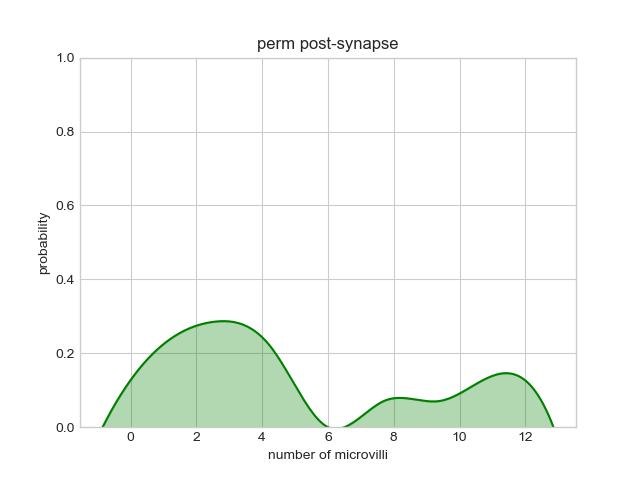

WT 0.6265040699073705


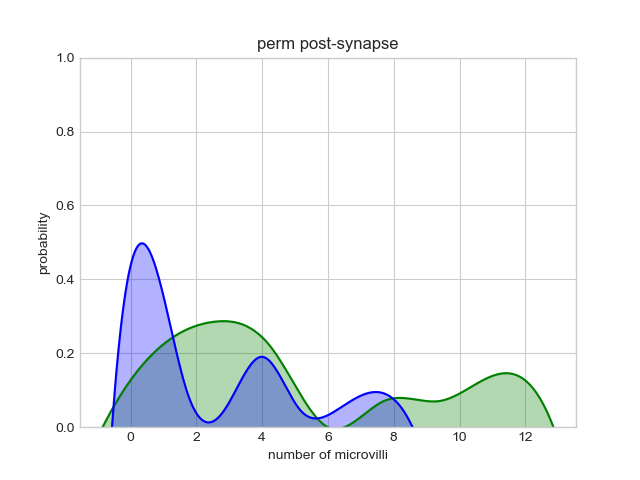

WT 0.6265040699073705
ck666 0.27804880090836664


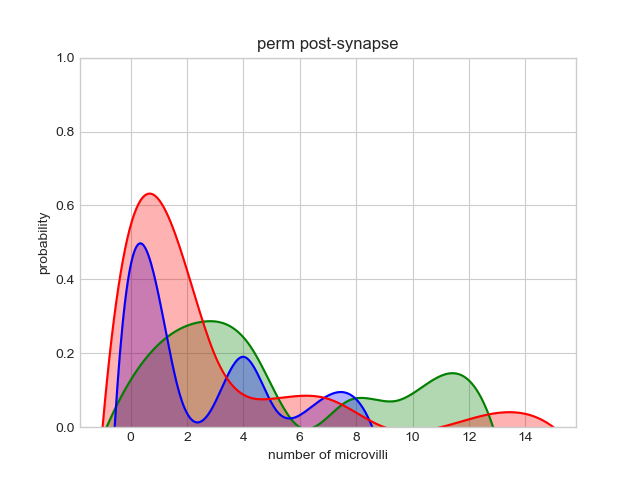

Mann-Whitney U Test P-Value (Group 1 vs. Group 2): 0.2219891526685157
Mann-Whitney U Test P-Value (Group 1 vs. Group 3): 0.013966355971322147
Mann-Whitney U Test P-Value (Group 2 vs. Group 3): 0.12669743045895523
WT 0.6265040699073705
ck666 0.27804880090836664
SMIHF2 0.2529262361995158


In [146]:
from scipy.interpolate import make_interp_spline, BSpline
def find_closest_value(number, values):
    closest_value = min(values, key=lambda x: abs(x - number))
    return closest_value

def get_histogram(data, bins):
    heights, bins = np.histogram(data, bins=bins, density=False)
    return heights, bins
def plot_histogram():
    plt.clf()
    colors = ['green', 'blue', 'red']  # Define the colors for the curves
    for i, data in enumerate(selected_lists):
        data = [i for i in data if i <=15]
        #bins1=np.linspace(0,15,15)
        heights, bins = get_histogram(data,7)
        
        bin_width = bins[1] - bins[0]
        adjusted_bins = np.concatenate([[bins[0] - bin_width], bins, [bins[-1] + bin_width]])

        x = (adjusted_bins[:-1] + adjusted_bins[1:]) / 2

        y = heights.tolist()
        y.insert(0, 0)  # Add 0 at the beginning
        y.append(0)     # Add 0 at the end

        density_y = [i / np.sum(y) for i in y]

        xnew = np.linspace(x.min(), x.max(), 200)

        spl = make_interp_spline(x, density_y, k=3)
        y_smooth = spl(xnew)

        color = colors[i % len(colors)]  # Select the color based on the button index
           
        plt.plot(xnew, y_smooth, label=button_names[selected_buttons[i]], color=color)
        plt.fill_between(xnew, y_smooth, alpha=0.3, color=color)
        plt.ylim(0, 1)

    plt.style.use('seaborn-whitegrid')
    plt.xlabel('number of microvilli')
    plt.ylabel('probability')
    plt.title('perm post-synapse')
   # plt.legend()
    plt.show()



    # Perform statistical tests between selected lists
    #if len(selected_lists) == 2:
    #    group1 = selected_lists[0]
     #   group2 = selected_lists[1]
    #    t_stat, p_value = ttest_ind(group1, group2)
    #    u_stat, mw_p_value = mannwhitneyu(group1, group2, alternative='two-sided')
    #    print("T-Statistic (Group 1 vs. Group 2):", t_stat)
    #    print("T-Test P-Value (Group 1 vs. Group 2):", p_value)
    #    print("U-Statistic (Group 1 vs. Group 2):", u_stat)
    #    print("Mann-Whitney U Test P-Value (Group 1 vs. Group 2):", mw_p_value)
    if len(selected_lists) == 3:
        group1 = selected_lists[0]
        group2 = selected_lists[1]
        group3 = selected_lists[2]
        t_stat1, p_value1 = ttest_ind(group1, group2)
        t_stat2, p_value2 = ttest_ind(group1, group3)
        t_stat3, p_value3 = ttest_ind(group2, group3)
        u_stat1, mw_p_value1 = mannwhitneyu(group1, group2, alternative='two-sided')
        u_stat2, mw_p_value2 = mannwhitneyu(group1, group3, alternative='two-sided')
        u_stat3, mw_p_value3 = mannwhitneyu(group2, group3, alternative='two-sided')
       # print("T-Statistic (Group 1 vs. Group 2):", t_stat1)
       # print("T-Test P-Value (Group 1 vs. Group 2):", p_value1)
       # print("U-Statistic (Group 1 vs. Group 2):", u_stat1)
        print("Mann-Whitney U Test P-Value (Group 1 vs. Group 2):", mw_p_value1)
       # print("T-Statistic (Group 1 vs. Group 3):", t_stat2)
       # print("T-Test P-Value (Group 1 vs. Group 3):", p_value2)
       # print("U-Statistic (Group 1 vs. Group 3):", u_stat2)
        print("Mann-Whitney U Test P-Value (Group 1 vs. Group 3):", mw_p_value2)
       # print("T-Statistic (Group 2 vs. Group 3):", t_stat3)
       # print("T-Test P-Value (Group 2 vs. Group 3):", p_value3)
       # print("U-Statistic (Group 2 vs. Group 3):", u_stat3)
        print("Mann-Whitney U Test P-Value (Group 2 vs. Group 3):", mw_p_value3)

    for i, data in enumerate(selected_lists):
        data = [i for i in data if i <=15]
        heights, bins = get_histogram(data, 7)
        bin_width = bins[1] - bins[0]
        adjusted_bins = np.concatenate([[bins[0] - bin_width], bins, [bins[-1] + bin_width]])

        x = (adjusted_bins[:-1] + adjusted_bins[1:]) / 2

        y = heights.tolist()
        y.insert(0, 0)  # Add 0 at the beginning
        y.append(0)     # Add 0 at the end

        density_y = [i / np.sum(y) for i in y]

        xnew = np.linspace(x.min(), x.max(), 200).tolist()

        spl = make_interp_spline(x, density_y, k=3)
        y_smooth = spl(xnew)
        weighted_average=[]
        for j in data:
            data_interpolated = find_closest_value(j,xnew)
            index = xnew.index(data_interpolated)
            weight=y_smooth[index]
            weighted_average.append(j*weight)
            
            
        print(button_names[selected_buttons[i]], np.mean(weighted_average))
def button_click(index):
    %matplotlib notebook
    if index not in selected_buttons:
        selected_buttons.append(index)
        selected_lists.append(lists[index])
    plot_histogram()


# Sample data for demonstration
lists = [
    WT_perm_syn_actin_roughness,
    WT_perm_syn_CD45_roughness,
    WT_perm_syn_perm_roughness,
    WT_perm_postsyn_actin_roughness,
    WT_perm_postsyn_CD45_roughness,
    WT_perm_postsyn_perm_roughness,
    ck666_perm_syn_actin_roughness,
    ck666_perm_syn_CD45_roughness,
    ck666_perm_syn_perm_roughness,
    ck666_perm_postsyn_actin_roughness,
    ck666_perm_postsyn_CD45_roughness,
    ck666_perm_postsyn_perm_roughness,
    SMIHF2_perm_syn_actin_roughness,
    SMIHF2_perm_syn_CD45_roughness,
    SMIHF2_perm_syn_perm_roughness,
    SMIHF2_perm_postsyn_actin_roughness,
    SMIHF2_perm_postsyn_CD45_roughness,
    SMIHF2_perm_postsyn_perm_roughness,
    
]
""""

button_names = [
'Actin',
'CD45',
'perm',
'Actin',
'CD45',
'perm',
'Actin',
'CD45',
'perm',
'Actin',
'CD45',
'perm',
'Actin',
'CD45',
'perm',
'Actin',
'CD45',
'perm'
]
"""""
button_names = [
'WT',
'WT',
'WT',
'WT',
'WT',
'WT',
'ck666',
'ck666',
'ck666',
'ck666',
'ck666',
'ck666',
'SMIHF2',
'SMIHF2',
'SMIHF2',
'SMIHF2',
'SMIHF2',
'SMIHF2'
]
# Create the main window
root = tk.Tk()

selected_buttons = []
selected_lists = []

# Create buttons
for i, lst in enumerate(button_names):
    button = tk.Button(root, text=lst, command=lambda index=i: button_click(index))
    button.pack()

# Start the Tkinter event loop
root.mainloop()